# Image Cartoonifier
## Applying Image Processing Filters For Image Cartoonifying

In [1]:
# import needed libraries
import cv2
import matplotlib.pyplot as plt
import glob

%matplotlib inline

In [2]:
# define helper functions

def plot_image(image, color, title):
    plt.title(title)
    if(color=="GRAY"):
        plt.imshow(image,cmap='gray')
    else:
        plt.imshow(image)
    plt.xticks([])
    plt.yticks([])


def plot_side_by_side(img_1, img_2, size=(12,8)):
    fig = plt.figure(figsize=(size))
    plt.axis('off')
    for i, img in enumerate([img_1, img_2]):
        ax = fig.add_subplot(1, 2, i+1)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.axis('off')



###  1. Generating black and white sketch and Noise Reduction Using Median Filter

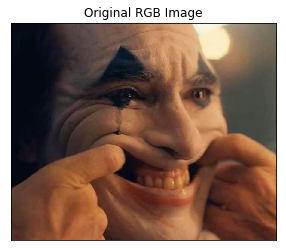

In [3]:
SAMPLE_IMAGE = 'images/sample.JPG'

image = cv2.imread(SAMPLE_IMAGE) # default color is BGR
image_RBG = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# plot the original image as RGB
plot_image(image_RBG, "RBG", "Original RGB Image")


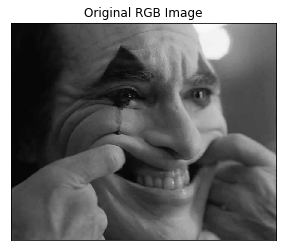

In [4]:
# convert the original image from RGB to Gray
image_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plot_image(image_gray,"GRAY","Original RGB Image")

## 2. Edge Detection Using Laplacian Filter

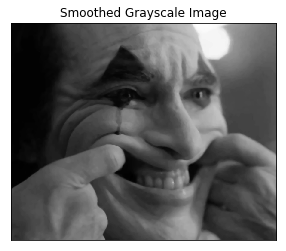

In [5]:
# smoothing the image using median filter with window size 7
median_image = cv2.medianBlur(image_gray, ksize=7)
plot_image(median_image,"GRAY","Smoothed Grayscale Image")

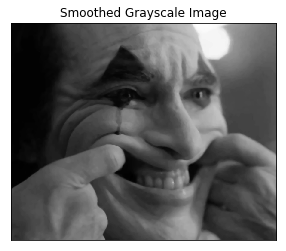

In [6]:
# smoothing the image using median filter with window size 7
median_image = cv2.medianBlur(image_gray, ksize=7)
plot_image(median_image,"GRAY","Smoothed Grayscale Image")

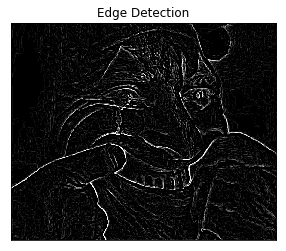

In [7]:
# Apply Laplacian Filter
laplacian_image = cv2.Laplacian(median_image, ddepth=-1, ksize=5)
plot_image(laplacian_image,"GRAY","Edge Detection")

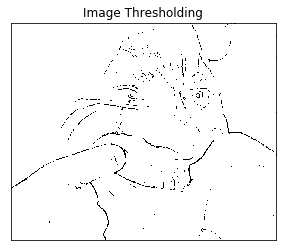

In [8]:
# Applying threshold with lower bound 125 and upper bound 255
ret,thresh = cv2.threshold(laplacian_image,125,255,cv2.THRESH_BINARY_INV)
plot_image(thresh,"GRAY","Image Thresholding")

## 3. Generating a color painting and a cartoon

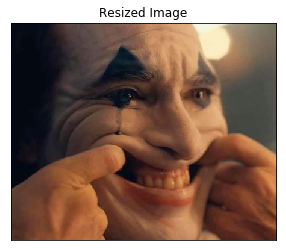

In [9]:
# resize the image to half of its original size
resized_image = cv2.resize(image, (0,0), fx=0.5, fy=0.5)
plot_image(cv2.cvtColor(resized_image,cv2.COLOR_BGR2RGB),"RBG","Resized Image")

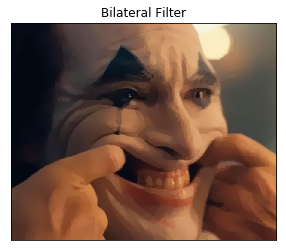

In [10]:
#### applying 7 iterations of bilateral fiter
iterations = 7
for i in range(iterations):
    resized_image = cv2.bilateralFilter(resized_image, d=9, sigmaColor=9, sigmaSpace=7)
bilateral_image=cv2.resize(resized_image,(image.shape[1],image.shape[0]))
plot_image(cv2.cvtColor(bilateral_image,cv2.COLOR_BGR2RGB),"RGB","Bilateral Filter")

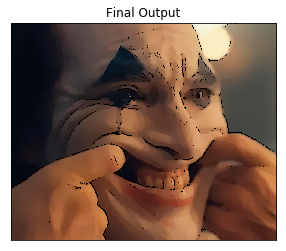

In [11]:
#### combine the edges withe the bilateral filtered image
cartoon = cv2.bitwise_and(bilateral_image,cv2.cvtColor(thresh,cv2.COLOR_GRAY2BGR))
plot_image(cv2.cvtColor(cartoon, cv2.COLOR_BGR2RGB), "RGB", "Final Output")

## 4. Final Function

In [12]:
#  composite all steps in one function
#  1. convert the image to gray
#  2. reduce noise on the image using medianBlur filter
#  3. use the function Laplacian() to detect edges
#  4. put a threshold on the result and invert pixels
#  5. apply 7 iterations of bilateral filtering
#  6. combine the result cartoon effect with the original image using bitwise_and function 
#  and return the final result

def image_cartoonifier_converter(image):
    image_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    median_image = cv2.medianBlur(image_gray, ksize=7)
    laplacian_image = cv2.Laplacian(median_image, ddepth=-1,ksize=5)
    ret,thresh = cv2.threshold(laplacian_image,125,255,cv2.THRESH_BINARY_INV)
    iterations = 7
    resized_image = cv2.resize(image, (0,0), fx=0.5, fy=0.5)
    for i in range(iterations):
        resized_image = cv2.bilateralFilter(resized_image, d=9, sigmaColor=9, sigmaSpace=7)
    bilateral_image = cv2.resize(resized_image,(image.shape[1],image.shape[0]))
    cartoon = cv2.bitwise_and(bilateral_image,cv2.cvtColor(thresh,cv2.COLOR_GRAY2BGR))        
    return cartoon


def convert(images, save_path=None):
    i = 0
    cartoons = []
    for image in images:
        i += 1
        cartoon = image_cartoonifier_converter(image)
        cartoons.append(cartoon)
        if save_path:
            im_name = str(i) + ".JPG"
            cv2.imwrite(save_path + im_name, cartoon)
    return cartoons


In [13]:
images = [cv2.imread(file) for file in glob.glob('images/*')]
cartoons = convert(images)

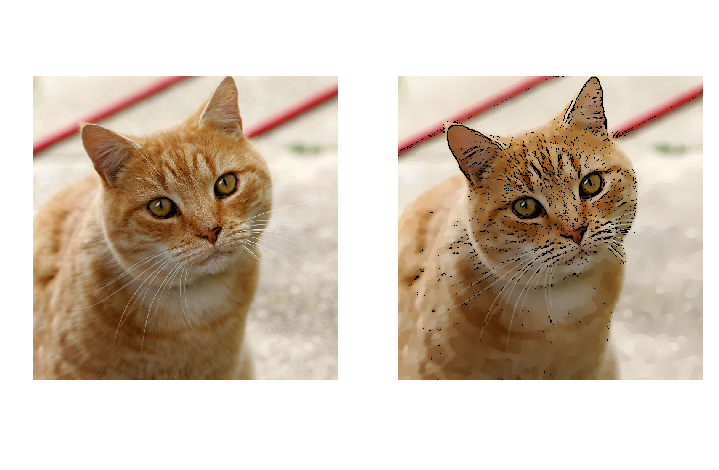

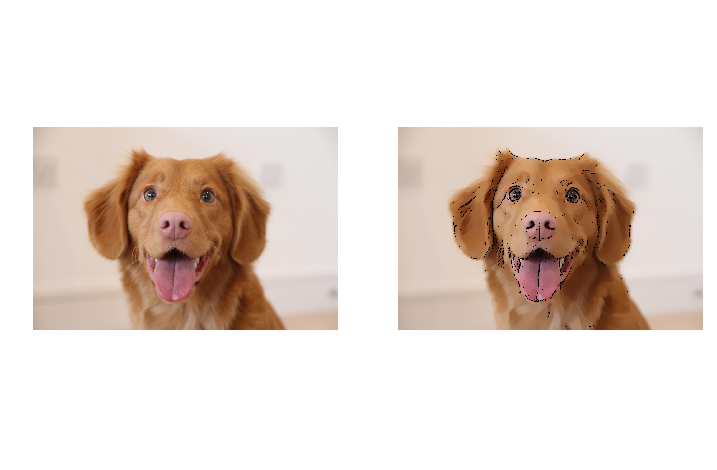

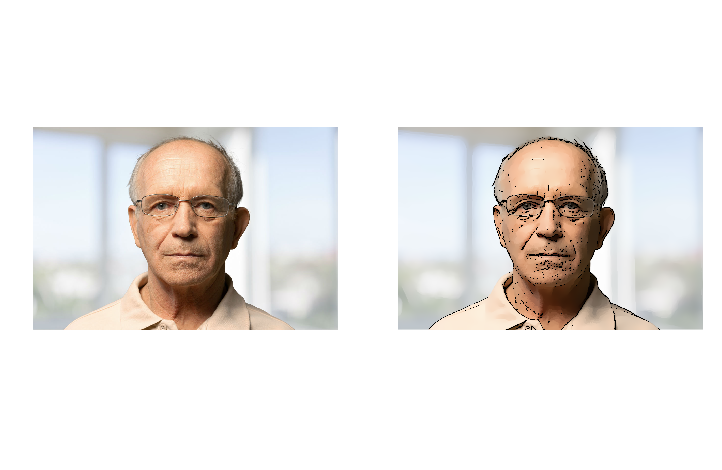

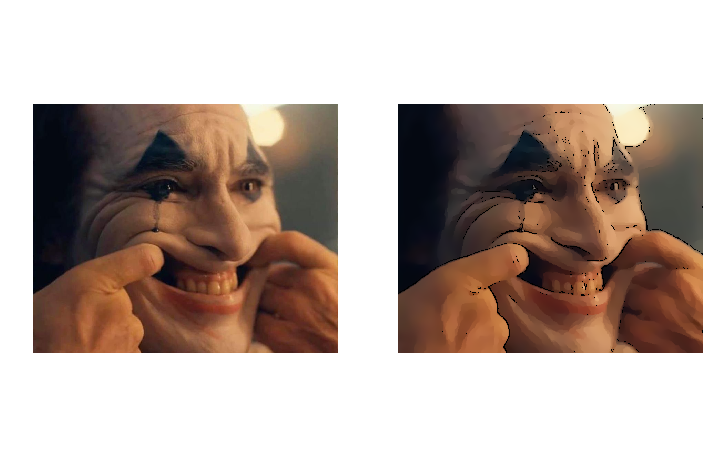

In [14]:
# plot results
size = 5
for i in range(min(size, len(images))):
    plot_side_by_side(images[i], cartoons[i])